In [ ]:
5!pip install kaggle
!pip install transformers
!pip install scikit-learn

**Importing the Dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input, Dropout # Import Conv1D
from tensorflow.keras.models import Sequential # imports the Sequential class from tensorflow.keras.models
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

**Data Collection- Kaggle API**


In [ ]:
kaggle_dictionary = json.load(open("/content/kaggle.json"))

In [ ]:
#setup kaggle credentials as environment variables
os.environ["KAGGLE_USERNAME"] = kaggle_dictionary["username"]
os.environ["KAGGLE_KEY"] = kaggle_dictionary["key"]

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 70% 18.0M/25.7M [00:00<00:00, 167MB/s]
100% 25.7M/25.7M [00:00<00:00, 134MB/s]


In [ ]:
!ls

datasets  imdb-dataset-of-50k-movie-reviews.zip  kaggle.json  path-to-save  sample_data


In [ ]:
#unzip the dataset file
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
!ls

 datasets	     imdb-dataset-of-50k-movie-reviews.zip   path-to-save
'IMDB Dataset.csv'   kaggle.json			     sample_data


In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [ ]:
data["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
data.replace({"sentiment": {"positive": 1, "negative":0}}, inplace = True)

<ipython-input-44-1537caaf0f1a>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
data["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
#split data into traaining data and test data
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


**Data Preprocessing**

In [ ]:
#Tokenizing the data
tokenizer = Tokenizer(num_words= 5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen = 200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen = 200)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [ ]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [ ]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [ ]:
print(Y_test)

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


**CNN**

Building CNN Model

In [ ]:
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim = 5000, output_dim = 128, input_length = 200))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Compile CNN Model

In [ ]:
cnn_model.compile(optimizer="adam", loss = "binary_crossentropy", metrics= ["accuracy"])

Train CNN Model

In [ ]:
cnn_model.fit(X_train, Y_train, epochs=3, batch_size=64, validation_split= 0.2)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7194 - loss: 0.5312 - val_accuracy: 0.8844 - val_loss: 0.2786
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9150 - loss: 0.2205 - val_accuracy: 0.8936 - val_loss: 0.2573
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9543 - loss: 0.1391 - val_accuracy: 0.8961 - val_loss: 0.2644


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
Y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")

# Generate the classification report
report = classification_report(Y_test, Y_pred, target_names=['Negative', 'positive'])

print("Classification Report:")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.91      0.90      4961
    positive       0.91      0.89      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



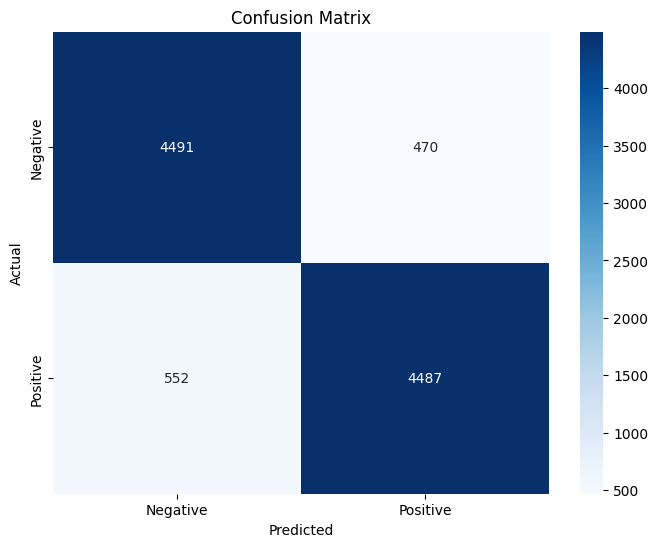

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Evaluate the Model


In [ ]:
loss, cnn_accuracy = cnn_model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {cnn_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8974 - loss: 0.2509
Test Loss: 0.2548633813858032
Test Accuracy: 0.8978000283241272


**LSTM: Long Short term Memory**

In [ ]:
#Building the model
from keras.models import Sequential # import the Sequential class from keras.models
from keras.layers import Embedding, LSTM, Dense # import Embedding, LSTM and Dense from keras.layers

model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 128, input_length = 200))
model.add(LSTM(128,dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1,activation= "sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile the model
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics= ["accuracy"])

In [ ]:
# import the LabelEncoder class from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)

**Training the Model**

In [ ]:
model.fit(X_train, Y_train, epochs=3, batch_size= 64, validation_split= 0.2)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 133s 256ms/step - accuracy: 0.7264 - loss: 0.5237 - val_accuracy: 0.8459 - val_loss: 0.3656
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 259ms/step - accuracy: 0.8547 - loss: 0.3503 - val_accuracy: 0.8547 - val_loss: 0.3383
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 254ms/step - accuracy: 0.8351 - loss: 0.3749 - val_accuracy: 0.8138 - val_loss: 0.4065


**Model Evaluation**

In [ ]:
Y_test = encoder.transform(Y_test)
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.8105 - loss: 0.4036
Test Loss: 0.40565523505210876
Test Accuracy: 0.8116999864578247


In [ ]:
# Generate the classification report
report = classification_report(Y_test, Y_pred, target_names=['Negative', 'positive'])

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.91      0.90      4961
    positive       0.91      0.89      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step


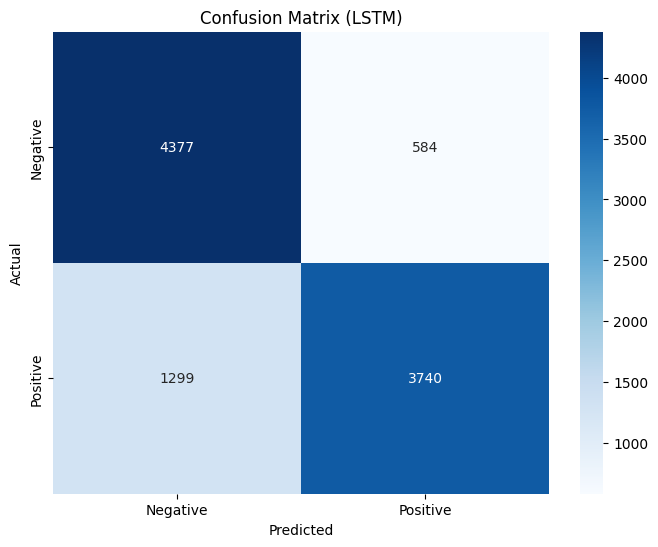

In [ ]:


# Make predictions on the test set using the LSTM model
Y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")

# Generate the confusion matrix for the LSTM model
cm_lstm = confusion_matrix(Y_test, Y_pred_lstm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LSTM)')
plt.show()

 **BERT MODEL**



In [ ]:
!pip install wordcloud
import os
import shutil
import tarfile
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
# Get the current working directory
current_folder = os.getcwd()

dataset = tf.keras.utils.get_file(
	fname ="aclImdb.tar.gz",
	origin ="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
	cache_dir= current_folder,
	extract = True)


84125825/84125825 [==============================] - 41s 0us/step


In [ ]:
dataset_path = os.path.dirname(dataset)
# Check the dataset
os.listdir(dataset_path)


['aclImdb.tar.gz', 'aclImdb']

In [ ]:
# Dataset directory
dataset_dir = os.path.join(dataset_path, 'aclImdb')

# Check the Dataset directory
os.listdir(dataset_dir)


['test', 'README', 'imdbEr.txt', 'train', 'imdb.vocab']

In [ ]:
# Dataset directory
dataset_dir = os.path.join(dataset_path, 'aclImdb')

# Check the Dataset directory
os.listdir(dataset_dir)


['test', 'README', 'imdbEr.txt', 'train', 'imdb.vocab']

In [ ]:
train_dir = os.path.join(dataset_dir,'train')
os.listdir(train_dir)

['neg',
 'pos',
 'urls_unsup.txt',
 'urls_pos.txt',
 'urls_neg.txt',
 'unsup',
 'unsupBow.feat',
 'labeledBow.feat']

In [ ]:
for file in os.listdir(train_dir):
    file_path = os.path.join(train_dir, file)
    # Check if it's a file (not a directory)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            first_value = f.readline().strip()
            print(f"{file}: {first_value}")
    else:
        print(f"{file}: {file_path}")

neg: /content/datasets/aclImdb/train/neg
pos: /content/datasets/aclImdb/train/pos
urls_unsup.txt: http://www.imdb.com/title/tt0018515/usercomments
urls_pos.txt: http://www.imdb.com/title/tt0453418/usercomments
urls_neg.txt: http://www.imdb.com/title/tt0064354/usercomments
unsup: /content/datasets/aclImdb/train/unsup
unsupBow.feat: 0 0:8 1:6 3:5 4:2 5:1 7:1 8:5 9:2 10:1 11:2 13:3 16:1 17:1 18:1 19:1 22:3 24:1 26:3 28:1 30:1 31:1 35:2 36:1 39:2 40:1 41:2 46:2 47:1 48:1 52:1 63:1 67:1 68:1 74:1 81:1 83:1 87:1 104:1 105:1 112:1 117:1 131:1 151:1 155:1 170:1 198:1 225:1 226:1 288:2 291:1 320:1 331:1 342:1 364:1 374:1 384:2 385:1 407:1 437:1 441:1 465:1 468:1 470:1 519:1 595:1 615:1 650:1 692:1 851:1 937:1 940:1 1100:1 1264:1 1297:1 1317:1 1514:1 1728:1 1793:1 1948:1 2088:1 2257:1 2358:1 2584:2 2645:1 2735:1 3050:1 4297:1 5385:1 5858:1 7382:1 7767:1 7773:1 9306:1 10413:1 11881:1 15907:1 18613:1 18877:1 25479:1
labeledBow.feat: 9 0:9 1:1 2:4 3:4 4:6 5:4 6:2 7:2 8:4 10:4 12:2 26:1 27:1 28:1 29

In [ ]:
def load_dataset(directory):
    data = {"sentence": [], "sentiment": []}
    for file_name in os.listdir(directory):
        print(file_name)
        if file_name == 'pos':
            positive_dir = os.path.join(directory, file_name)
            for text_file in os.listdir(positive_dir):
                text = os.path.join(positive_dir, text_file)
                with open(text, "r", encoding="utf-8") as f:
                    data["sentence"].append(f.read())
                    data["sentiment"].append(1)
        elif file_name == 'neg':
            negative_dir = os.path.join(directory, file_name)
            for text_file in os.listdir(negative_dir):
                text = os.path.join(negative_dir, text_file)
                with open(text, "r", encoding="utf-8") as f:
                    data["sentence"].append(f.read())
                    data["sentiment"].append(0)

    return pd.DataFrame.from_dict(data)

In [ ]:
# Load the dataset from the train_dir
train_df = load_dataset(train_dir)
print(train_df.head())

neg
pos
urls_unsup.txt
urls_pos.txt
urls_neg.txt
unsup
unsupBow.feat
labeledBow.feat
                                            sentence  sentiment
0  The writer came up with a pretty decent idea f...          0
1  This movie features a gorgeous brunette named ...          0
2  Be warned! <br /><br />This is crap that other...          0
3  Broad enough for you? Wait till you see this h...          0
4  I voted 3 for this movie because it looks grea...          0


In [ ]:
test_dir = os.path.join(dataset_dir,'test')

# Load the dataset from the train_dir
test_df = load_dataset(test_dir)
print(test_df.head())

neg
pos
urls_pos.txt
urls_neg.txt
labeledBow.feat
                                            sentence  sentiment
0  In 1989 here in NZ wrestling was somewhat of a...          0
1  Underwoods goofy story about a young man(Arque...          0
2  What is it about the French? First, they (appa...          0
3  I realize why people hate this film. And, I ha...          0
4  I saw this movie one time at a kiddie matinée ...          0


In [ ]:
def text_cleaning(text):
    soup = BeautifulSoup(text, "html.parser")
    text = re.sub(r'\[[^]]*\]', '', soup.get_text())
    pattern = r"[^a-zA-Z0-9\s,']"
    text = re.sub(pattern, '', text)
    return text

In [ ]:
# Train dataset
train_df['Cleaned_sentence'] = train_df['sentence'].apply(text_cleaning).tolist()
# Test dataset
test_df['Cleaned_sentence'] = test_df['sentence'].apply(text_cleaning)

<ipython-input-11-4a9c92faa406>:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-11-4a9c92faa406>:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [ ]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
    all_text = " ".join(text)
    wordcloud = WordCloud(width=800,
                          height=400,
                          stopwords=set(STOPWORDS),
                          background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

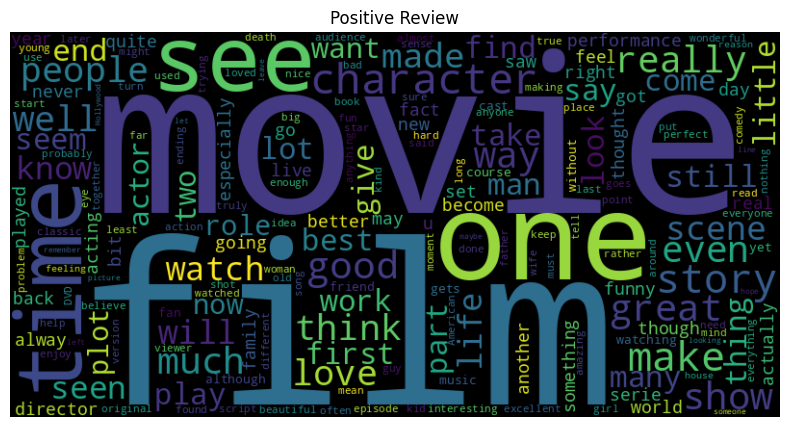

In [ ]:
positive = train_df[train_df['sentiment']==1]['Cleaned_sentence'].tolist()
generate_wordcloud(positive,'Positive Review')

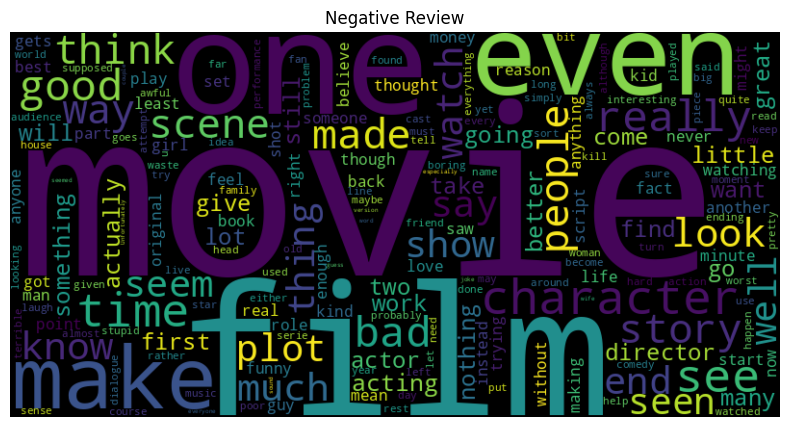

In [ ]:
negative = train_df[train_df['sentiment']==0]['Cleaned_sentence'].tolist()
generate_wordcloud(negative,'Negative Review')

In [ ]:

Reviews = train_df['Cleaned_sentence']
Target = train_df['sentiment']

test_reviews = test_df['Cleaned_sentence']
test_targets = test_df['sentiment']

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(test_reviews,
                                                    test_targets,
                                                    test_size=0.5,
                                                    stratify = test_targets)


In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



In [ ]:
max_len= 128
# Tokenize and encode the sentences
X_train_encoded = tokenizer.batch_encode_plus(Reviews.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(x_val.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(x_test.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')


In [ ]:
k = 0
print('Training Comments -->>',Reviews[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',Target[k])

Training Comments -->> The writer came up with a pretty decent idea for a story, but many flaws in the execution of the plot took so much away from the film as to nearly render it unwatchable Basic elements such as character development were glossed over, at best Inconsistencies also reared their ugly heads A massive mansion in the middle of the rural Irish countryside Characters just showing up in the gardens during a stormy night at very convenient times, I might add All in all it wasn't bad I rated it a 4, based mostly on the story and talent of Alison Elliott

Input Ids -->>
 tf.Tensor(
[  101  1996  3213  2234  2039  2007  1037  3492 11519  2801  2005  1037
  2466  1010  2021  2116 21407  1999  1996  7781  1997  1996  5436  2165
  2061  2172  2185  2013  1996  2143  2004  2000  3053 17552  2009  4895
 18866  3085  3937  3787  2107  2004  2839  2458  2020 27068  2098  2058
  1010  2012  2190  4297  5644 27870 14767  2036 23295  2037  9200  4641
  1037  5294  7330  1999  1996  2690 

In [ ]:

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:

history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
    Target,
    validation_data=(
      [X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
    batch_size=32,
    epochs=3
)

Epoch 1/3
782/782 [==============================] - 811s 983ms/step - loss: 0.3426 - accuracy: 0.8466 - val_loss: 0.2729 - val_accuracy: 0.8830
Epoch 2/3
782/782 [==============================] - 767s 981ms/step - loss: 0.1984 - accuracy: 0.9225 - val_loss: 0.3041 - val_accuracy: 0.8772
Epoch 3/3
782/782 [==============================] - 768s 982ms/step - loss: 0.1032 - accuracy: 0.9632 - val_loss: 0.3068 - val_accuracy: 0.8896


In [ ]:

test_loss, test_accuracy = model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']],
    y_test
)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

391/391 [==============================] - 107s 274ms/step - loss: 0.3087 - accuracy: 0.8901
Test loss: 0.3086528182029724, Test accuracy: 0.8900799751281738


In [ ]:
path = 'path-to-save'
tokenizer.save_pretrained(path +'/Tokenizer')

model.save_pretrained(path +'/Model')

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained(path +'/Tokenizer')

bert_model = TFBertForSequenceClassification.from_pretrained(path +'/Model')

Some layers from the model checkpoint at path-to-save/Model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at path-to-save/Model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
pred = bert_model.predict(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

label = {
    1: 'positive',
    0: 'Negative'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label    :', Actual[:10])

391/391 [==============================] - 110s 271ms/step
Predicted Label : ['positive', 'positive', 'positive', 'positive', 'Negative', 'Negative', 'positive', 'positive', 'Negative', 'positive']
Actual Label    : ['positive', 'positive', 'positive', 'Negative', 'Negative', 'Negative', 'Negative', 'positive', 'Negative', 'positive']


In [ ]:
print("Classification Report: \n", classification_report(Actual, pred_labels))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      6250
    positive       0.88      0.91      0.89      6250

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



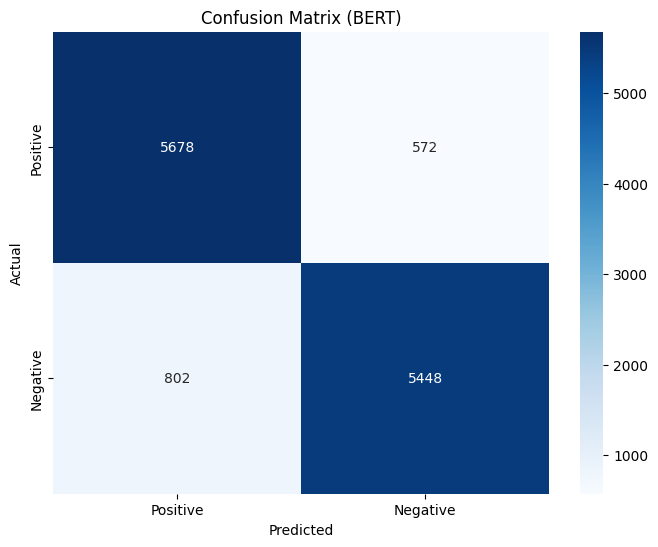

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Actual' and 'pred_labels' are your lists of true and predicted labels
cm = confusion_matrix(Actual, pred_labels, labels=['positive', 'Negative'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (BERT)')
plt.show()

In [ ]:
def Get_sentiment(Review, Tokenizer=bert_tokenizer, Model=bert_model):
    # Convert Review to a list if it's not already a list
    if not isinstance(Review, list):
        Review = [Review]

    Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(Review,
                                                                             padding=True,
                                                                             truncation=True,
                                                                             max_length=128,
                                                                             return_tensors='tf').values()
    prediction = Model.predict([Input_ids, Token_type_ids, Attention_mask])

    # Use argmax along the appropriate axis to get the predicted labels
    pred_labels = tf.argmax(prediction.logits, axis=1)

    # Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
    pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
    return pred_labels

In [ ]:
Review ='''Bahubali is a blockbuster Indian movie that was released in 2015.
It is the first part of a two-part epic saga that tells the story of a legendary hero who fights for his kingdom and his love.
The movie has received rave reviews from critics and audiences alike for its stunning visuals,
spectacular action scenes, and captivating storyline.'''
Get_sentiment(Review)

1/1 [==============================] - 3s 3s/step


['positive']

# **Comparative Analysis of Models**


**Create a bar chart**

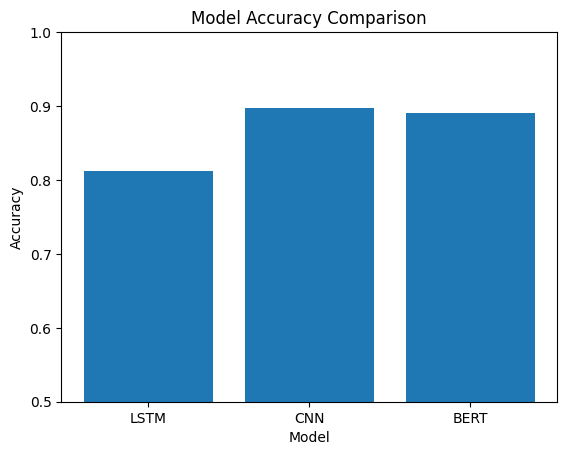

In [ ]:

models = ['LSTM', 'CNN', 'BERT']
accuracies = [accuracy, cnn_accuracy, test_accuracy]

plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.show()

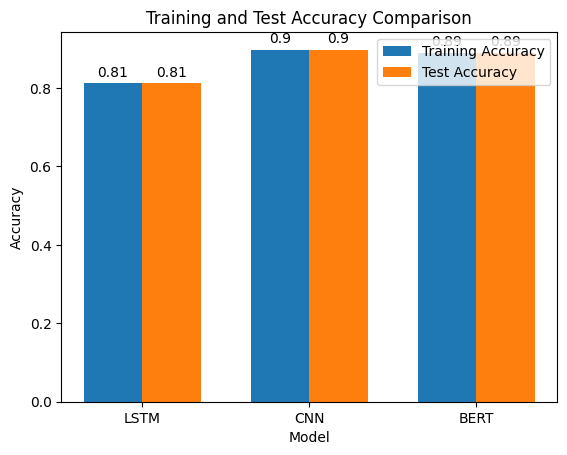

In [ ]:
import matplotlib.pyplot as plt

models = ['LSTM', 'CNN', 'BERT']
train_accuracies = [accuracy, cnn_accuracy, test_accuracy]
test_accuracies = [accuracy, cnn_accuracy, test_accuracy]

fig, ax = plt.subplots()

bar_width = 0.35

train_bars = ax.bar(np.arange(len(models)) - bar_width / 2, train_accuracies, bar_width, label='Training Accuracy')

test_bars = ax.bar(np.arange(len(models)) + bar_width / 2, test_accuracies, bar_width, label='Test Accuracy')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Test Accuracy Comparison')
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(train_bars)
autolabel(test_bars)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(review, model=model):  # Assuming 'lstm_model' is your trained LSTM model
    """Predicts the sentiment of a review using the LSTM model.

    Args:
        review (str): The review text.
        model: The model used for prediction. Defaults to lstm_model.

    Returns:
        str: The predicted sentiment ('positive' or 'negative').
    """
    # Preprocess the review
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)  # Assuming maxlen is 200

    # Make prediction
    prediction = model.predict(padded_sequence)

    # Interpret prediction
    if prediction[0][0] >= 0.5:
        return 'positive'
    else:
        return 'negative'

complex_reviews = [
    "This movie was a masterpiece, a cinematic triumph that left me breathless and deeply moved. The performances were superb, the direction masterful, and the plot intricately woven. However, there were a few moments that felt slightly rushed, and the ending, while impactful, could have been more satisfying.",
    "The film was a complete disaster. The acting was wooden, the script nonsensical, and the pacing excruciatingly slow. It was an absolute waste of time and money. I would advise anyone to steer clear of this cinematic abomination.",
    "I found the movie to be a mixed bag. While there were some genuinely brilliant moments and powerful performances, the overall plot felt disjointed and confusing at times. The pacing was uneven, and some of the character motivations were unclear. It had potential, but ultimately fell short of its aspirations."
]


lstm_sentiments = [predict_sentiment(review) for review in complex_reviews]
print("LSTM Sentiments:", lstm_sentiments)

cnn_sentiments = [(cnn_model.predict(pad_sequences(tokenizer.texts_to_sequences([review]), maxlen=200)) > 0.5).astype("int32")[0][0] for review in complex_reviews]
cnn_sentiments = ['positive' if sentiment == 1 else 'negative' for sentiment in cnn_sentiments]
print("CNN Sentiments:", cnn_sentiments)

bert_sentiments = Get_sentiment(complex_reviews) # Assuming 'Get_sentiment' is defined for BERT
print("BERT Sentiments:", bert_sentiments)

print("\nReview Comparison:")
for i, review in enumerate(complex_reviews):
    print(f"\nReview {i+1}: {review}")
    print(f"LSTM Sentiment: {lstm_sentiments[i]}")
    print(f"CNN Sentiment: {cnn_sentiments[i]}")
    print(f"BERT Sentiment: {bert_sentiments[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
LSTM Sentiments: ['negative', 'negative', 'negative']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
CNN Sentiments: ['negative', 'positive', 'positive']
1/1 [==============================] - 0s 103ms/step
BERT Sentiments: ['positive', 'Negative', 'Negative']

Review Comparison:

Review 1: This movie was a masterpiece, a cinematic triumph that left me breathless and deeply moved. The performances were superb, the direction masterful, and the plot intricately woven. However, there were a few moments that felt slightly rushed, and the ending, while impactful, could have been more satisfying.
LSTM Sentiment: negative
CNN Sentiment: negative
BERT Sentiment: positive

Review 2: The film was a complete disaster. The acting was wooden, the script nonsensical, and the pacing excruciatingly slow. It was an absol